# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

In [2]:
print(weather_api_key)

096d18d0ae5eb26669288b97f570fba6


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q=" + city
weather_response = requests.get(city_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(weather_json)
print(weather_json["coord"]["lon"])

{'coord': {'lon': -156.3051, 'lat': 20.9219}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 293.64, 'feels_like': 293.89, 'temp_min': 293.16, 'temp_max': 295.95, 'pressure': 1020, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 50}, 'clouds': {'all': 20}, 'dt': 1700157281, 'sys': {'type': 1, 'id': 7879, 'country': 'US', 'sunrise': 1700152571, 'sunset': 1700192643}, 'timezone': -36000, 'id': 7262697, 'name': 'Haiku-Pauwela', 'cod': 200}
-156.3051


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | haiku-pauwela
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | coquimbo
Processing Record 5 of Set 1 | jinka
Processing Record 6 of Set 1 | kurchatov
Processing Record 7 of Set 1 | toga village
City not found. Skipping...
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | taki
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | susuman
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | ceyhan
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | patacamaya
Processing Record 18 of Set 1 | sinabang
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | cedar city
Processing Record 22 of Set 1

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,283.53,58,55,2.96,RO,1700158363
1,haiku-pauwela,20.9219,-156.3051,296.51,82,40,4.63,US,1700158363
2,waitangi,-43.9535,-176.5597,288.05,93,98,3.58,NZ,1700158363
3,coquimbo,-29.9533,-71.3436,290.45,66,0,5.80,CL,1700158364
4,jinka,5.6500,36.6500,292.35,85,74,1.29,ET,1700158364


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,283.53,58,55,2.96,RO,1700158363
1,haiku-pauwela,20.9219,-156.3051,296.51,82,40,4.63,US,1700158363
2,waitangi,-43.9535,-176.5597,288.05,93,98,3.58,NZ,1700158363
3,coquimbo,-29.9533,-71.3436,290.45,66,0,5.80,CL,1700158364
4,jinka,5.6500,36.6500,292.35,85,74,1.29,ET,1700158364


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

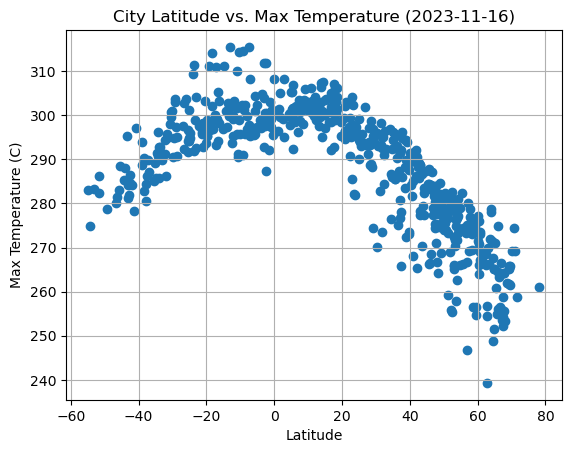

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-11-16)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

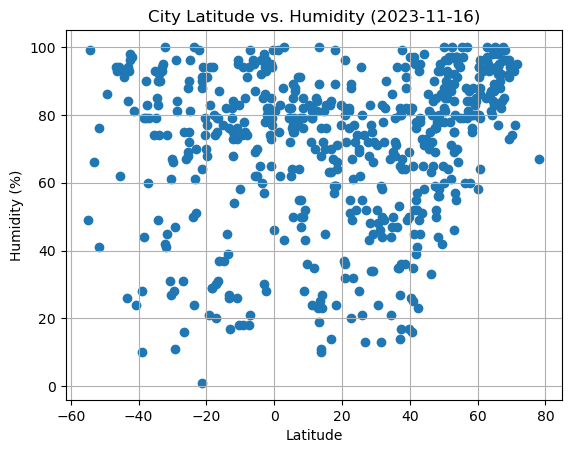

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-16)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

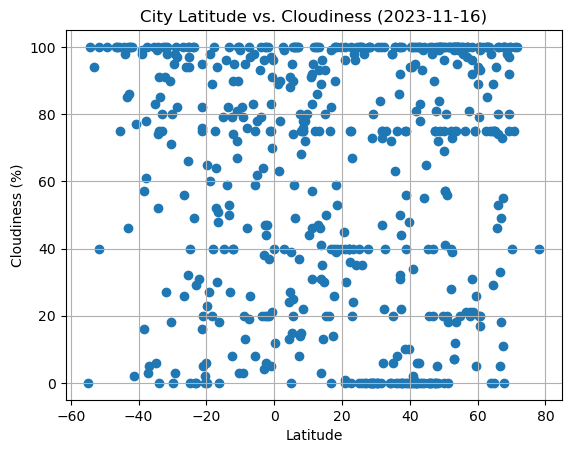

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-16)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

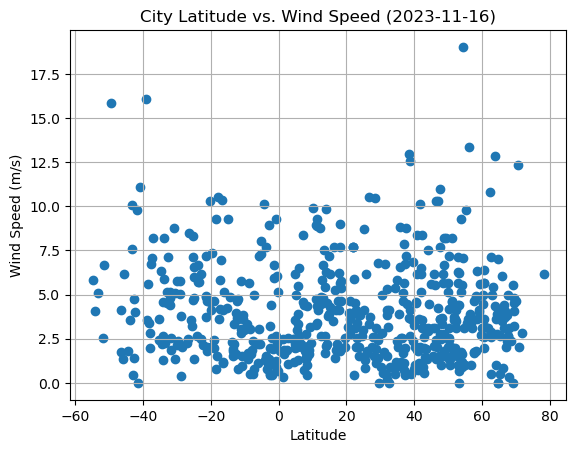

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-16)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def create_plot(x,y,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(20,20),fontsize=15,color="red",xycoords="axes pixels")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,283.53,58,55,2.96,RO,1700158363
1,haiku-pauwela,20.9219,-156.3051,296.51,82,40,4.63,US,1700158363
4,jinka,5.6500,36.6500,292.35,85,74,1.29,ET,1700158364
5,kurchatov,51.6601,35.6521,278.38,97,100,3.72,RU,1700158364
8,taki,22.5861,88.9214,296.12,89,100,4.55,IN,1700158367


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,288.05,93,98,3.58,NZ,1700158363
3,coquimbo,-29.9533,-71.3436,290.45,66,0,5.80,CL,1700158364
6,invercargill,-46.4000,168.3500,281.49,93,100,1.74,NZ,1700158366
7,port-aux-francais,-49.3500,70.2167,278.76,86,100,15.83,TF,1700158366
9,bredasdorp,-34.5322,20.0403,291.42,85,99,2.34,ZA,1700158367


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.782184862829635


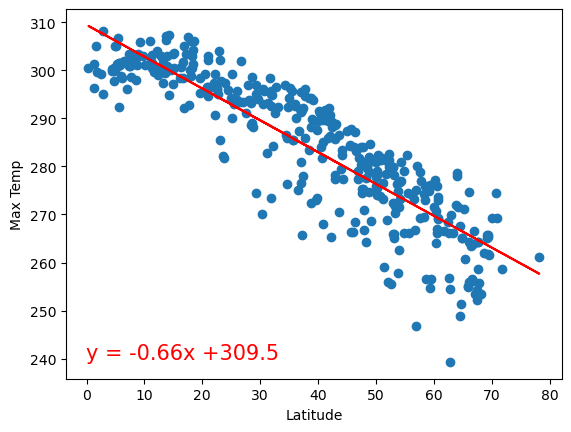

In [41]:
# Linear regression on Northern Hemisphere
create_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temp')

The r-value is: 0.44883849092308464


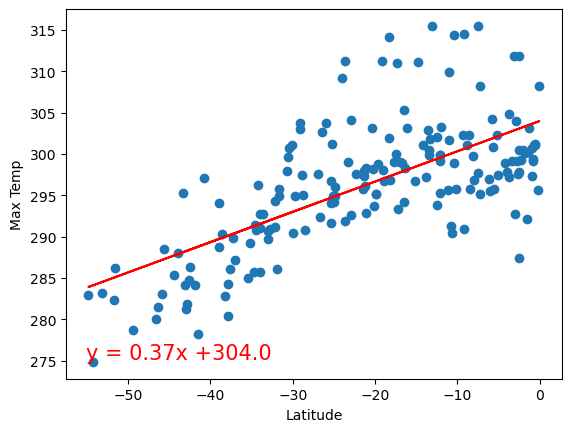

In [42]:
# Linear regression on Southern Hemisphere
create_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1172418953269588


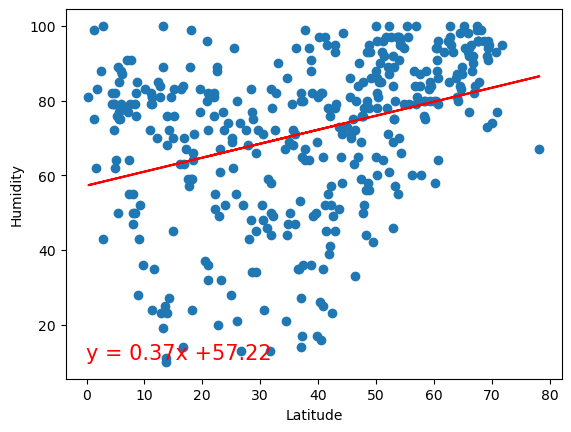

In [43]:
# Northern Hemisphere
create_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 4.01398968219839e-06


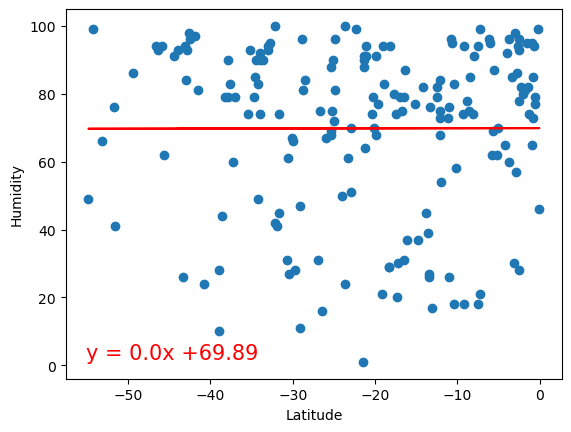

In [45]:
# Southern Hemisphere
create_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.009699638295454109


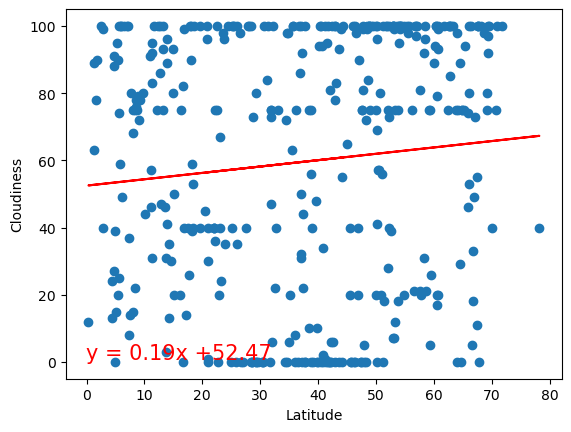

In [46]:
# Northern Hemisphere
create_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.027929388824437032


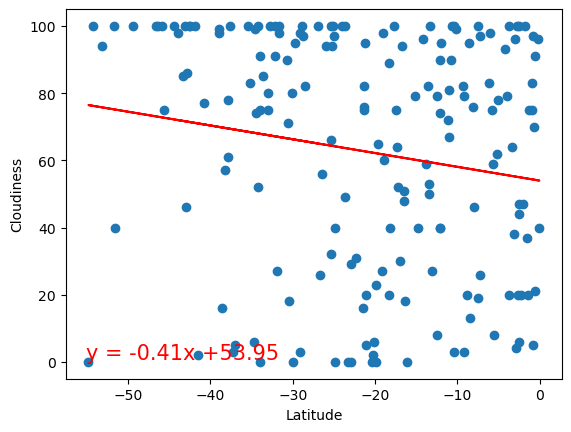

In [47]:
# Southern Hemisphere
create_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0019214997023257294


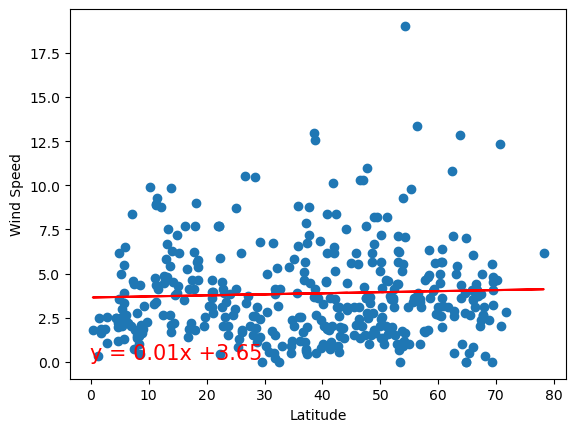

In [48]:
# Northern Hemisphere
create_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: 0.05835654960928046


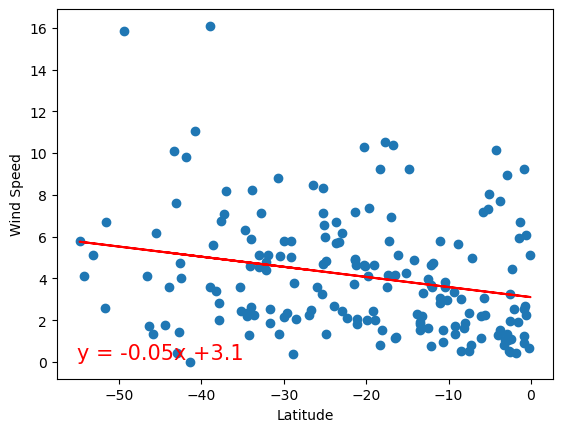

In [49]:
# Southern Hemisphere
create_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE